In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.49.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (159 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
  Using cached pillow-10.2.0-cp310-cp310-many

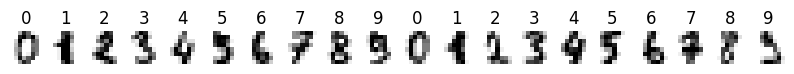

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
dataset = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=20, figsize=(10, 3))
for ax, image, label in zip(axes, dataset.images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("%i" % label)

These examples are based heavily on [this tutorial](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py).

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

X,y = datasets.load_digits(return_X_y=True)

naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

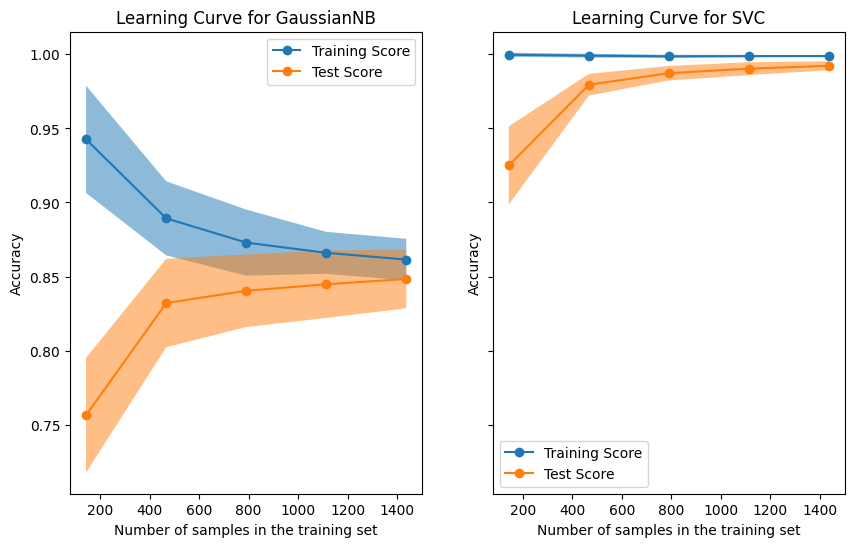

In [9]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
    

Execises:
* validation curves: small vs large NN
    - need to show failure to generalize due to overfitting
* training curves

[This tutorial](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) has nice plots.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.utils import shuffle

X,y = datasets.load_digits(return_X_y=True)
X,y = shuffle(X, y, random_state=0)

/home/kevin/.pyenv/versions/3.10.13/envs/sb_weekly_06/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kevin/.pyenv/versions/3.10.13/envs/sb_weekly_06/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/kevin/.pyenv/versions/3.10.13/envs/sb_weekly_06/lib/python3.10/site-packages/sklearn/neura

TypeError: list.append() takes exactly one argument (2 given)

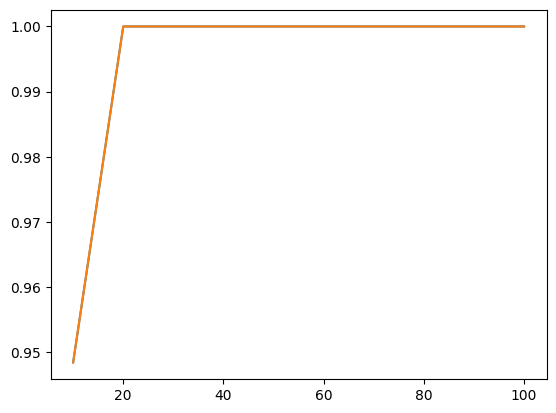

In [13]:

clf_1 = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(10, 10),
    random_state=1
)
clf_2 = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes=(100, 100),
    random_state=1
)

ValidationCurveDisplay.from_estimator(
    clf_1, X, y,
    param_name="hidden_layer_sizes",
    param_range=[ (10, 10), (20, 20), (50,50), (100,100)],
)
